In [1]:
import numpy as np

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# seaborn
import seaborn as sns
sns.set()

# pickle
import pickle

# cv2
import cv2

import os

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Read the data

The neural-activation (*in pickle format*) data consists of an organized dictionary with the following entries:

* `images_paths`: numpy array containing paths to all the 1960 images
* `image_ctg`: numpy array containing class labels from 0 -> 6
* `image_splits` : 1960 x 10 numpy array containing 10 80:20 train:val splits used in the paper. Though I generate my own validation splits for computing the sit scores
* `features`: 168 dimensional(for multi-unit) neural_features for all the images i.e 1960 x 168 numpy array
* `categ_name_map`: dictionary mapping from numeric class label to class name e.g. face, animal etc.

The dataset consists of images belonging to 7 classes and 49 object types. The image paths are arranged in an order such that the images belonging to a particular object type are together. There are 40 images per object in the dataset, so images [1 - 40] belong to object 1, images [41 - 80] belong to object 2 and so on.

In [2]:
data_path = 'data/PLoSCB2014_data_20141216'
with open('data/PLoSCB2014_data_20141216/NeuralData_IT_multiunits.pkl','rb') as f:
    data = pickle.load(f)
    
print ("Data keys: {}".format(list(data.keys())))

Data keys: ['image_paths', 'image_ctg', 'image_splits', 'features', 'categ_name_map']


In [4]:
data['categ_name_map'].values()

dict_values(['Animals', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables'])

### Visualize the dataset

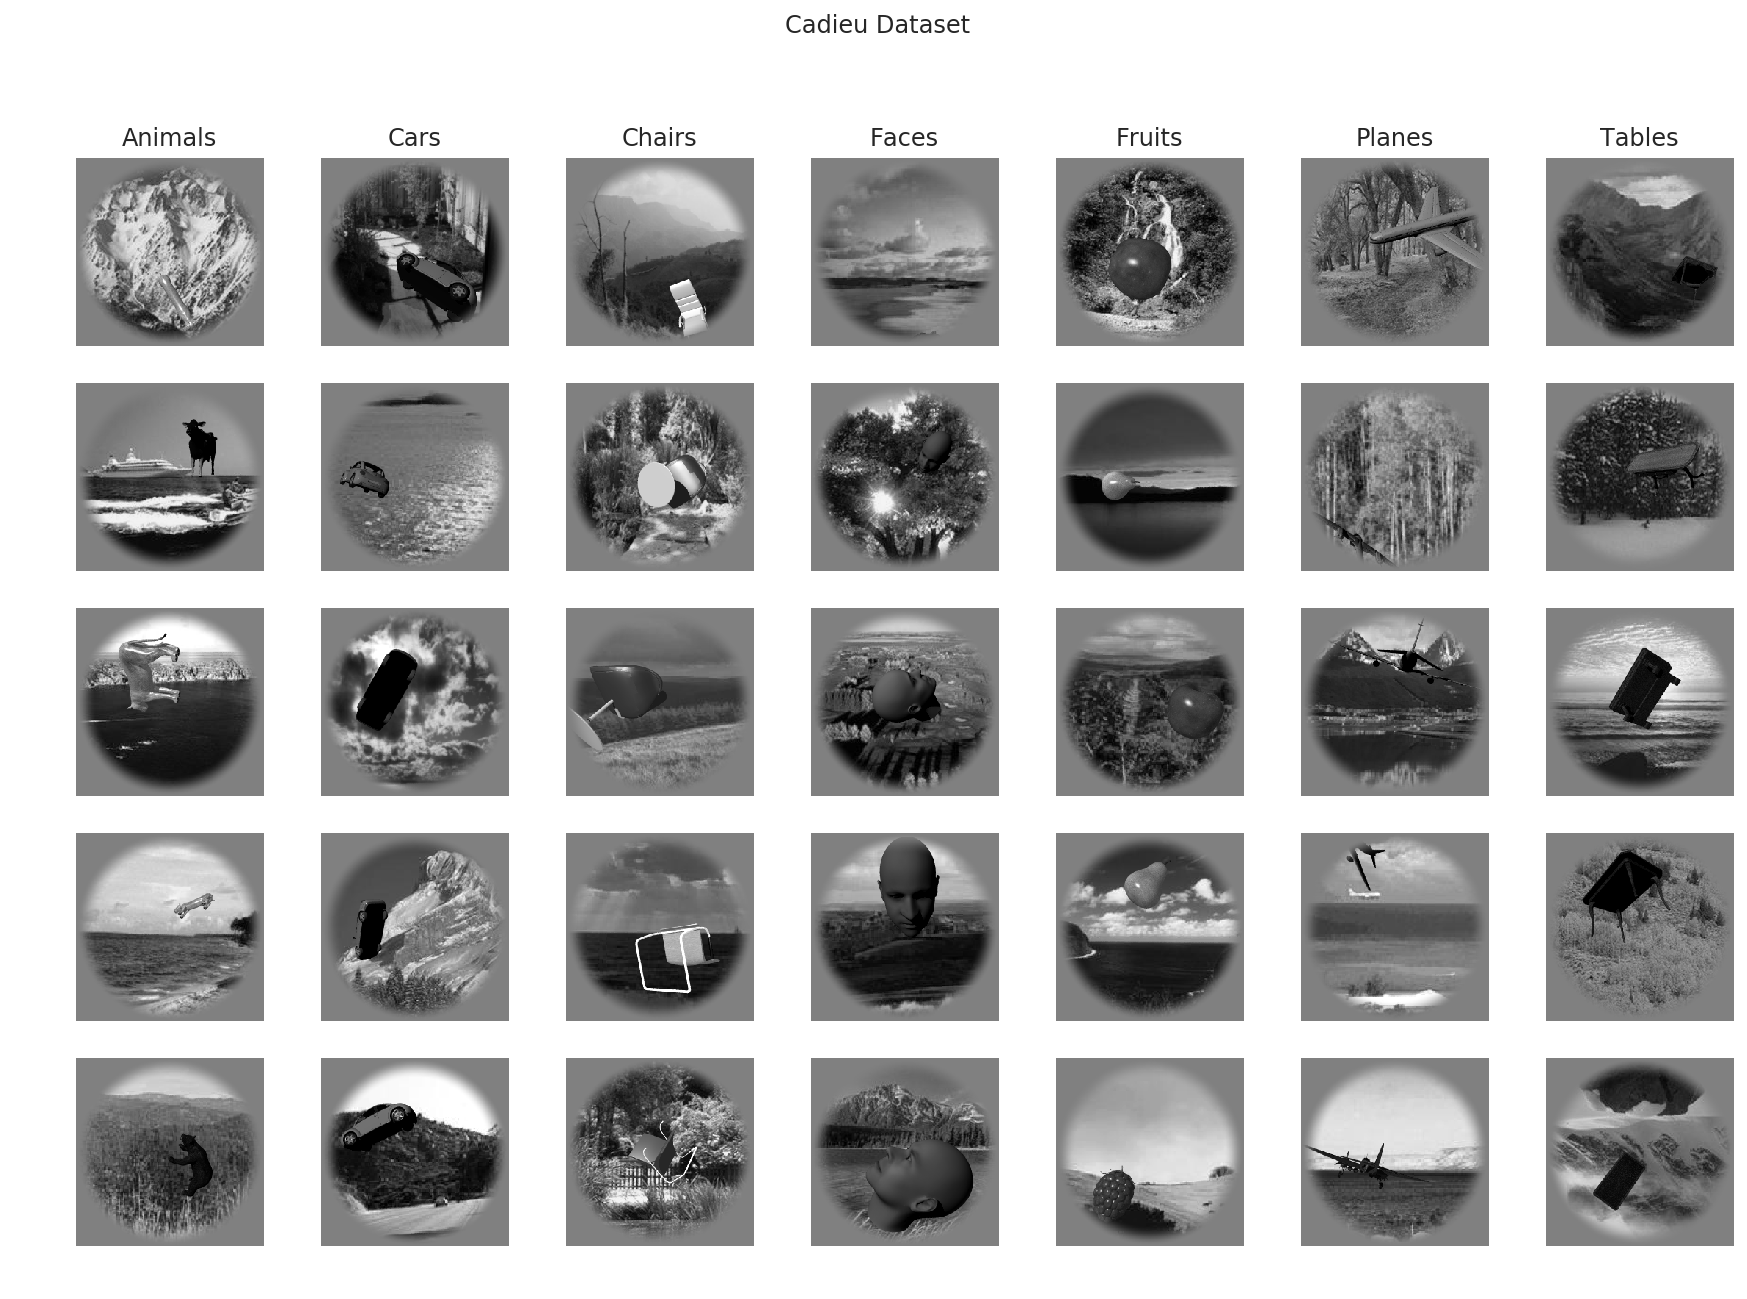

In [33]:
# number of classes
num_class = len(data['categ_name_map'])

# number of images per class in the dataset
num_img_per_class = len(data['image_paths'])//num_class

# num samples per class
num_samples_per_class = 5

# visualize the input images
fig,axs = plt.subplots(nrows=num_samples_per_class,ncols=num_class,figsize=(15,10))

for i in range(num_class):
    axs[0,i].set_title(data['categ_name_map'][i])
    
    sample_indices = np.random.choice(range(i*num_img_per_class,(i+1)*num_img_per_class),
                                                      num_samples_per_class,replace=False)
    
    for j,sample_num in enumerate(sample_indices):
        im = cv2.imread(os.path.join(data_path,data['image_paths'][sample_num]))
        axs[j,i].imshow(im)
        axs[j,i].grid(False)
        axs[j,i].axis('off')
        
fig.suptitle('Cadieu Dataset')
plt.savefig('assets/cadieu_dataset_visualization.png',dpi=300)
plt.show()

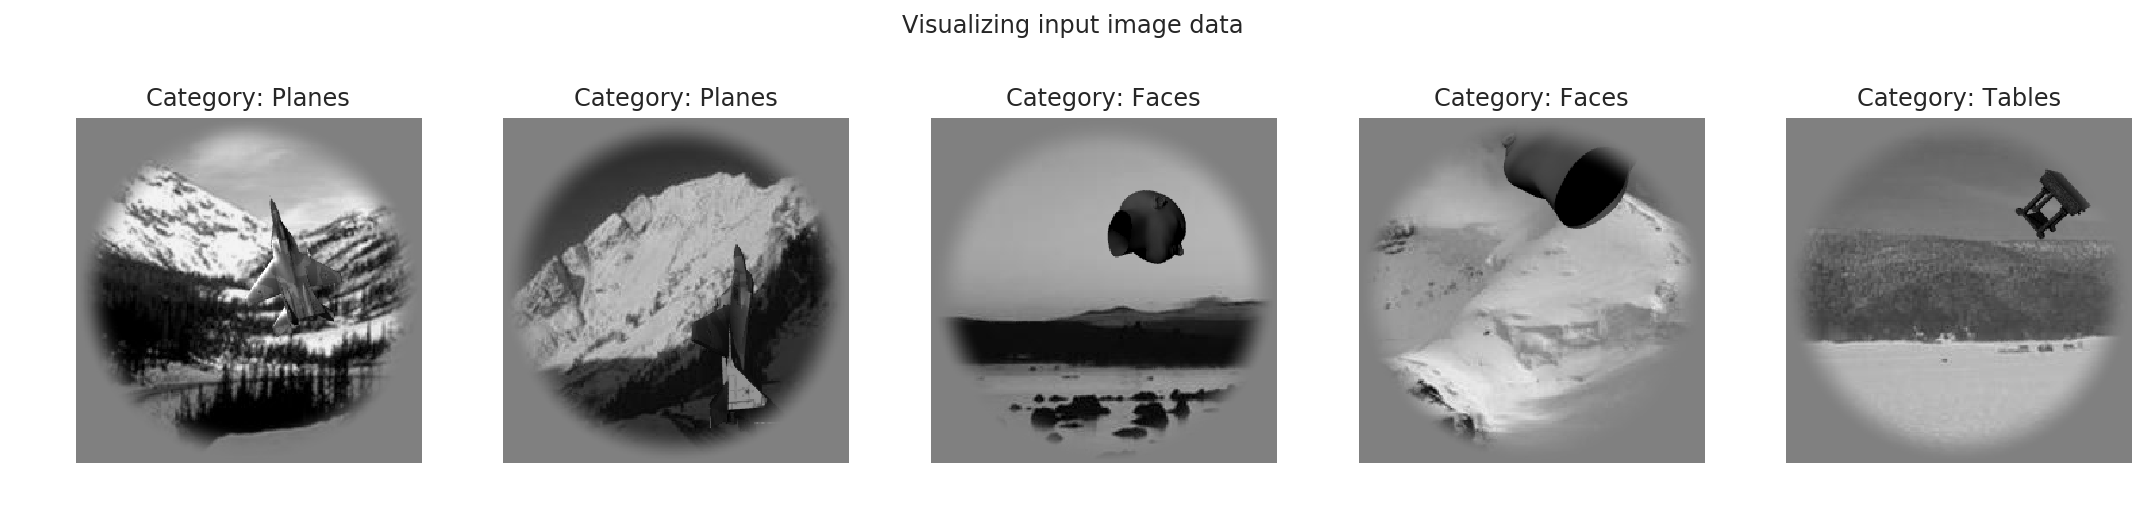

In [34]:
# check random samples from the dataset

# num samples
num_sample=5

# sample from image paths
samples = np.random.choice(range(len(data['image_paths'])),num_sample)

# visualize the input images
fig,axs = plt.subplots(nrows=1,ncols=num_sample,figsize=(15,4))

for i,img_num in enumerate(samples):
    im = cv2.imread(os.path.join(data_path,data['image_paths'][img_num]))
    im_ctg = data['categ_name_map'][data['image_ctg'][img_num]]
    axs[i].set_title('Category: '+ str(im_ctg))
    axs[i].imshow(im)
    axs[i].grid(False)
    axs[i].axis('off')

fig.suptitle('Visualizing input image data')
plt.tight_layout()
plt.show()